# Uczenie maszynowe w Pythonie: `scikit-learn`

Na poprzednich zajęciach poznaliśmy bibliotekę `pandas`, która pozwala na przeprowadzenie podstawowej analizy danych: od wczytania i ich przetworzenia, aż do przeprowadzenia analizy.  

Celem dzisiejszych zajęć jest zapoznanie się z biblioteką `scikit-learn`, która dostarcza narzędzia do budowania modeli uczenia maszynowego. Jest ona kompaktybilna z pozostałymi bibliotekami z ekosystemu.

Biblioteka dostarcza m.in. następujące elementy:
 * zbiory danych,
 * modele,
 * metryki,
 * narzędzia do przetwarzania danych.

`Scikit-learn` dostarcza kilka klasycznych zbiorów danych do uczenia maszynowego. Lista dostępnych modeli jest dostępna [tutaj](https://scikit-learn.org/stable/datasets/toy_dataset.html). Podczas dzisiejszych zajęć będziemy korzystać ze zbioru _Iris_, który zawiera informacje o rozmiarach płatków i liści 150 egzemplarzy trzech odmian kosaćca (rodzaj kwiata). 

In [1]:
from sklearn import datasets

data = datasets.load_iris()

In [2]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
import pandas as pd

features = pd.DataFrame(data['data'], columns=data['feature_names'])
labels = pd.Series(data['target'])

In [4]:
features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
labels.head()

0    0
1    0
2    0
3    0
4    0
dtype: int32

In [6]:
labels.sample(10)

130    2
132    2
57     1
56     1
7      0
77     1
86     1
129    2
53     1
110    2
dtype: int32

Od 2020 roku można zaimportować zbiór jako `DataFrame`: 

In [7]:
data_df = datasets.load_iris(as_frame=True)
data_df['data']

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
data_df['target']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

Będziemy chcieli wytrenować model, który przewidzi odmianę kosaćca na podstawie podanych cech (długość i szerokość płatków i listków).

Podzielny podany zbiór danych na dwie części: treningowy i testowy:

In [9]:
from sklearn.model_selection import train_test_split

# x - zbiór cech
# y - klasa, którą chcemy przewidzieć
# train_x - zbiór treningowy cech
# test_y - zbiór lablelek testowych

train_x, test_x, train_y, test_y = train_test_split(features, labels, test_size=0.33, random_state=42)

Przetestujmy model k-najbliższych sąsiadów:

In [10]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(5)
model.fit(train_x, train_y)

KNeighborsClassifier()

Sprawdźmy skuteczność modelu:

In [11]:
from sklearn.metrics import accuracy_score

predictions = model.predict(test_x)
accuracy_score(predictions, test_y)

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.98

__Zadanie 1__:
 * Załaduj zbiór `datasets.load_wine()`, który zawiera informacje o winie z trzech odmian winogron. Opis datasetu można znaleźć [tutaj](https://archive.ics.uci.edu/ml/datasets/wine).
 * Sprawdź jak zachowuje się skuteczności algorytmu k-najbliższych sąsiadów na tym dla wartości parametru `k` od 1 do 50.
 * Stwórz szereg danych, który będzie zawierał wyniki tego eksperymentu.
 * Znajdź największą wartość w tym szeregu. Dla jakiego klucza jest ona osiągnięta? (_podpowiedź:_ wykorzystaj metodę `argmax()`)


In [15]:
data_wine = datasets.load_wine(as_frame=True)
data_wine['data']

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [22]:
# Assign features and labels to separate variables
wine_features = pd.DataFrame(data_wine['data'], columns=data_wine['feature_names'])
wine_labels = pd.Series(data_wine['target'])

In [23]:
wine_features.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [50]:
wine_labels.sample(5)

28     0
133    2
116    1
142    2
126    1
Name: target, dtype: int32

In [51]:
wine_labels.unique()

array([0, 1, 2])

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Divide data set to train and test:
train_x, test_x, train_y, test_y = train_test_split(wine_features, wine_labels, test_size=0.33, random_state=42)

In [43]:
k_values = []
pred = []
   
for k in range(1,51):

    model = KNeighborsClassifier(k)
    model.fit(train_x, train_y)
    predictions = model.predict(test_x)
    
    k_values.append(k)
    pred.append(accuracy_score(predictions, test_y))

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

In [46]:
# Find max value > which k?
print(max(pred))
print(f'k:{pred.index(max(pred))+1}')

0.7796610169491526
k:1


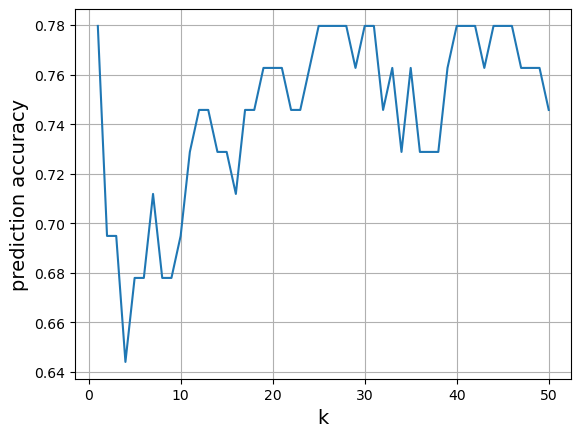

In [53]:
# Visualize results on line chart:

import matplotlib.pyplot as plt
plt.plot(k_values, pred)
plt.xlabel('k', fontsize=14)
plt.ylabel('prediction accuracy', fontsize=14)
plt.grid()

Sprawdźmy, które klasy są najcześciej mylone i wykorzystajmy do tego macierz błędu (ang _confussion matrix_):

In [48]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_y, predictions)

array([[20,  0,  0],
       [ 0, 15,  9],
       [ 1,  5,  9]], dtype=int64)

Takie same informacje możemy uzyskać korzystaj z funkcji `pivot_table` z biblioteki `pandas`: 

In [49]:
df = pd.DataFrame({'pred': predictions, 'ref': test_y})

pd.pivot_table(df, index='ref', columns='pred', aggfunc=len)

pred,0,1,2
ref,,,
0,20.0,NaN,NaN
1,NaN,15.0,9.0
2,1.0,5.0,9.0


## Przetwarzanie danych

Biblioteka `scikit-learn` dostarcza również narzędzia do przetwarzania danych, m.in.:
 * przeskalowanie (`StandardScaler`, `MinMaxScaler`, `MaxAbsScaler`, `Normalizer`),
 * redukcja wymiaru (`PCA`),
 * etykietowane (`LabelEncoder`)

## Transformaty
Służą do tego transformaty (ang. _transformers_), które dostarczają ten sam zbiór metod:
 * `fit`
 * `transform`
 * `fit_transform`

In [7]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split

data = datasets.load_iris()
features = pd.DataFrame(data['data'], columns=data['feature_names'])
labels = pd.Series(data['target'])

train_x, test_x, train_y, test_y = train_test_split(features, labels, test_size=0.33, random_state=42)


In [9]:
train_x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
96,5.7,2.9,4.2,1.3
105,7.6,3.0,6.6,2.1
66,5.6,3.0,4.5,1.5
0,5.1,3.5,1.4,0.2
122,7.7,2.8,6.7,2.0
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_x)
train_scaled = scaler.transform(train_x)

train_scaled[:5]

array([[-0.13835603, -0.26550845,  0.22229072,  0.10894943],
       [ 2.14752625, -0.02631165,  1.61160773,  1.18499319],
       [-0.25866563, -0.02631165,  0.39595535,  0.37796037],
       [-0.8602136 ,  1.16967238, -1.39857913, -1.37061074],
       [ 2.26783585, -0.50470526,  1.66949594,  1.05048772]])

In [56]:
print('Mean:', scaler.mean_)
print('Scale:', scaler.scale_)

Mean: [5.815 3.011 3.816 1.219]
Scale: [0.83118891 0.41806578 1.72746751 0.74346419]


In [57]:
train_scaled.mean(axis=0)

array([ 1.70530257e-15, -2.43249865e-15, -1.93178806e-16, -1.46549439e-16])

In [63]:
from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

wine = load_wine()
train_x, test_x, train_y, test_y = train_test_split(wine.data, wine.target, test_size=0.2, random_state=0)

model = KNeighborsClassifier(1)
model.fit(train_x, train_y)

predictions = model.predict(test_x)
accuracy_score(predictions, test_y)

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.7777777777777778

In [59]:
# skalowanie podnosi wynik predykcji:
scaler = StandardScaler()
scaler.fit(train_x)
train_scaled = scaler.transform(train_x)

model.fit(train_scaled, train_y)
test_scaled = scaler.transform(test_x)

predictions = model.predict(test_scaled)
accuracy_score(predictions, test_y)


C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9166666666666666

### Redukcja wymiaru: PCA

In [60]:
from sklearn.decomposition import PCA

pca = PCA(2)


__zadania 2__: Sprawdź czy dodanie PCA do powyższego przykładu poprawia wynik. Dane najpierw powinny zostać przeskalowane, później zastosowana redukcja wymiaru do dwóch. 

### Potoki przekształceń (ang. _pipelines_)

Tak jak w powyższym zadaniu często bywa, że chcemy nakładać na siebie kolejne transformaty, tj. wyjście z jednej jest wejściem do następnej. Biblioteka `scikit-learn` pozwala na łatwiejsze tworzenie tego typu potoków. Służy do tego funkcja `make_pipeline()`: 

In [69]:
from sklearn.pipeline import make_pipeline
# najpierw skalujemy, potem PCA, potem KNeighbors:
pipeline = make_pipeline(StandardScaler(), PCA(2), KNeighborsClassifier(1))
# trenujemy potok:
pipeline.fit(train_x, train_y)
# przepuszczamy zbiór testowy przez wcześniej zdefiniowane transformaty
predictions = pipeline.predict(test_x)
accuracy_score(predictions, test_y)

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9722222222222222

In [70]:
pipeline.steps

[('standardscaler', StandardScaler()),
 ('pca', PCA(n_components=2)),
 ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=1))]

### Obsługa danych jakościowych

In [71]:
titanic = pd.read_csv('titanic_train.tsv', delimiter='\t')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund\t Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings\t Mrs. John Bradley (Florence Briggs T...,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen\t Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle\t Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen\t Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


W tym przykładzie mamy następujące dane jakościowe:
 * `Sex`
 * `Embarked`
 * `Pclass`

Do danych jakościowych możemy wykorzystać następujące transformaty:
 * `OrdinalEncoder`: zamienia klasę na odpowiadającą jej liczbę. Podobną funkcjonalność dostarcza `LabelEncoder`.
 * `OneHotEncoder`: dla każdej wartości jest tworzona osobna cecha.

In [72]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
encoder.fit(titanic[['Sex']])
print('klasy:', encoder.categories_)
print(encoder.transform(titanic[['Sex']])[:10])

klasy: [array(['female', 'male'], dtype=object)]
[[1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]]


In [73]:
from sklearn.preprocessing import OneHotEncoder

print(titanic[['Embarked']].loc[:3])
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
encoder.fit(titanic[['Embarked']].dropna())
print(encoder.categories_)
print(encoder.transform(titanic[['Embarked']])[:3])

  Embarked
0        S
1        C
2        S
3        S
[array(['C', 'Q', 'S'], dtype=object)]
[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


### Łączenie transformat

Domyślnie wszystkie transformaty przetwarzają wszystkie cechy jednocześnie. Jeżeli chcemy wykorzystać transformatę wyłącznie do jednej (lub kilku) cech, musimy wykorzystać `ColumnTransformer`:

In [74]:
from sklearn.compose import ColumnTransformer
col_1 = ColumnTransformer(
    [
        ('encoder_sex', OneHotEncoder(handle_unknown='ignore'), ['Sex']),
        ('encoder_emb', OneHotEncoder(handle_unknown='ignore'), ['Embarked'])
    ],
    remainder='passthrough')
col_1.fit_transform(titanic)[:1]

array([[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1, 0, 3,
        'Braund\t Mr. Owen Harris', 22.0, 1, 0, 'A/5 21171', 7.25, nan]],
      dtype=object)

__zadanie 3__: Poniżej został załadowany zbiór danych `tips`, który zawiera informacje o wysokości napiwków w pewnej restauracji w zależności od kilku czynników:
 * Przekształć kolumny `smoker` i `sex` za pomocą `OridinalEncoder`, zaś kolumny `day` i `time` za pomocą `OneHotEncoder`.
 * Połącz obie transformaty w `ColumnTransformer` i wyświetl pierwszy przykład po przetworzeniu.

In [ ]:
tips = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv')
features = tips.drop('tip', axis='columns')


### Modele

Biblioteka `scikit-learn` dostarcza wiele podstawowych modeli uczenia maszynowego: klasyfikatory i regresory, których pełną listę można sprawdzić [tutaj](https://scikit-learn.org/stable/supervised_learning.html). Wszystkie modele współdzielą ten sam interfejs, czyli 3 metody: `fit`, `predict` i `fit_predict`.

In [ ]:
iris = datasets.load_iris()
train_x, test_x, train_y, test_y = train_test_split(iris.data, iris.target, test_size=0.2, random_state=0)
knn = KNeighborsClassifier(5)
knn.fit(train_x, train_y)
knn.predict(test_x)

from sklearn.svm import SVC

svm = SVC()
svm.fit(train_x, train_y)
svm.predict(test_x)


__zadanie 4:__ Poniżej znajdziesz przygotowany zbiór danych, który został podzielony na część treningową i testową.
 * `FunctionTransformer` pozwala na przekształcenie danych za pomocą podanej funkcji ([dokumentacja](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.FunctionTransformer.html)). Stwórz potok, który przetworzy kolumny `population` i `gdp` za pomocą `gdp` i wytrenuje model regresji liniowej (`LinearRegression` - [dokumentacja](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)).
   * Wyświetl współczynniki modelu oraz wyraz wolny (`intercept`)  
 * Oblicz błąd średniokwadratowy korzystając z funkcji `mean_squared_error` z `sklearn.metrics`.



In [ ]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LinearRegression

df = pd.read_csv('./gapminder.csv', index_col=0)
features = df.drop('life_expectancy', axis='columns')
y = df['life_expectancy']
train_x, test_x, train_y, test_y = train_test_split(features, y, test_size=0.2, random_state=0)



__zadanie 5__ (dodatkowe): Zbiór danych `titanic` pochodzi z serwisu [kaggle.com](https://www.kaggle.com). Celem zbioru jest przewidzenie, czy dana osoba przeżyła katastrofę titanica. 

 * Zobacz przykładową analizę i rozwiązanie: https://www.kaggle.com/startupsci/titanic-data-science-solutions
 * Spróbuj zbudować jak najlepszy model.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

titanic = pd.read_csv('titanic_train.tsv', delimiter='\t')
features = titanic.drop('Survived', axis='columns')
y = titanic['Survived']
train_x, test_x, train_y, test_y = train_test_split(features, y, test_size=0.2, random_state=42)